In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [3]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
deli = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/delivery/DELIVERY.csv', parse_dates=['일자'])
call = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/통화_T-map 데이터/Calldata.csv',parse_dates=['일자(YYYYMMDD)'])

In [5]:
call.head()

,일자(YYYYMMDD),연령,성별,발신지(시도),발신지(시군구),대분류,중분류,통화비율(시군구내)
0,2020-02-18,30,남성,강원,강릉시,교통편의,자동차시설,0.0002
1,2020-02-06,40,남성,강원,강릉시,의료편의,의료시설,0.0002
2,2020-02-04,30,남성,강원,강릉시,금융편의,주요금융,0.0002
3,2020-02-04,40,여성,강원,강릉시,생활편의,생활서비스,0.0001
4,2020-02-17,50,남성,강원,강릉시,생활편의,생활서비스,0.0002


# **1. 중구**

In [6]:
delij = deli.query('시도 == "서울특별시" & 시군구 == "중구"')
delij = delij.drop(['Unnamed: 0'], axis=1)
delijg = delij.groupby(['일자']).agg(np.sum)

delijg.index = delijg.index.strftime('%m-%d')
delijg = delijg.drop('시간대', axis=1)

In [8]:
call.columns = ['일자', '연령', '성별', '발신도', '발신구', '대분류', '중분류', '통화비율']

callj = call.query('발신구 == "중구" & 대분류 == "음식점"')
# callj = callj[callj['일자'] < '2020']
calljg = callj.groupby(['일자']).agg(np.sum)

calljg.index = calljg.index.strftime('%m-%d')
calljg.drop(['연령'], axis=1, inplace=True)

In [9]:
pd.Series(pd.concat([delijg.iloc[10:13,0].reset_index(drop=True),delijg.iloc[17:20,0].reset_index(drop=True)], axis=1).sum(axis=1)/2)

0    1846.5
1    2055.5
2    2142.0
dtype: float64

In [10]:
delijg.iloc[3, 0] = 1846.5
delijg.iloc[4, 0] = 2055.5
delijg.iloc[5, 0] = 2142.0

In [11]:
pd.Series(pd.concat([calljg.iloc[10:13,0].reset_index(drop=True), calljg.iloc[17:20,0].reset_index(drop=True)], axis=1).sum(axis=1)/2)

0    0.01175
1    0.01180
2    0.01105
dtype: float64

In [12]:
calljg.iloc[3, 0] = 0.01175
calljg.iloc[4, 0] = 0.01180
calljg.iloc[5, 0] = 0.01105

In [13]:
# 2019는 맨 앞에 버리고, W-Fri

# **2.노원구**

In [14]:
delin = deli.query('시도 == "서울특별시" & 시군구 == "노원구"')
delin = delin.drop(['Unnamed: 0'], axis=1)
deling = delin.groupby(['일자']).agg(np.sum)

deling.index = deling.index.strftime('%m-%d')
deling = deling.drop('시간대', axis=1)

In [15]:
pd.Series(pd.concat([deling.iloc[10:13,0].reset_index(drop=True),deling.iloc[17:20,0].reset_index(drop=True)], axis=1).sum(axis=1)/2)

0    1187.5
1    1393.0
2    1495.5
dtype: float64

In [16]:
deling.iloc[3, 0] = 1187.5
deling.iloc[4, 0] = 1393.0
deling.iloc[5, 0] = 1495.5

In [17]:
calln = call.query('발신구 == "노원구" & 대분류 == "음식점"')
# callj = callj[callj['일자'] < '2020']
callng = calln.groupby(['일자']).agg(np.sum)

callng.index = callng.index.strftime('%m-%d')
callng.drop(['연령'], axis=1, inplace=True)

In [18]:
pd.Series(pd.concat([callng.iloc[10:13,0].reset_index(drop=True),callng.iloc[17:20,0].reset_index(drop=True)], axis=1).sum(axis=1)/2)

0    0.0010
1    0.0012
2    0.0012
dtype: float64

In [19]:
callng.iloc[3, 0] = 0.0010
callng.iloc[4, 0] = 0.0012
callng.iloc[5, 0] = 0.0012

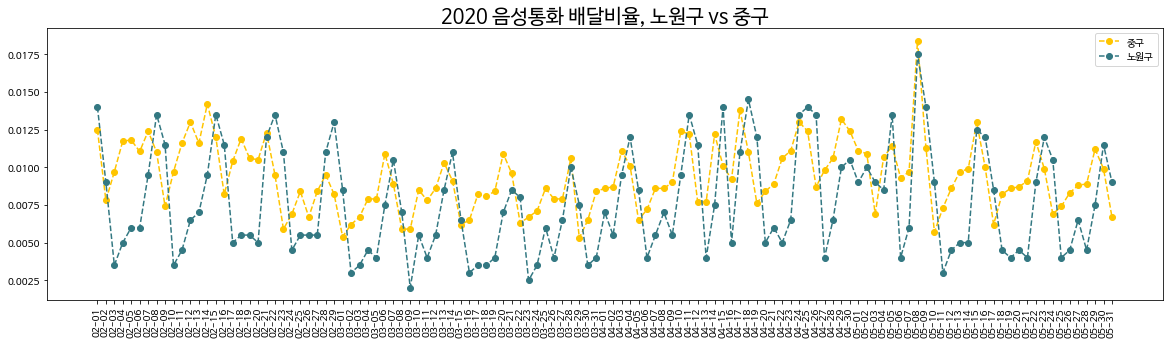

In [20]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
line1, =plt.plot(calljg.iloc[:,0],linestyle='--', marker='o',color = '#ffc500')
line2, =plt.plot(callng.iloc[:,0]*5,linestyle='--', marker='o',color = '#337882')

plt.legend(handles=[line1, line2], labels=['중구','노원구'])

plt.title('2020 음성통화 배달비율, 노원구 vs 중구',fontsize=20)
# 노원구 비율 보정한 것
plt.show()

In [21]:
# 중구는 목금에 치솟고 주말에 확 떨어지고 월화수 점차 늘어나는 형태
# 노원구는 금토일에 치솟고(토요일에 젤 많음), 월화수에는 잔잔하거나 점차 늘음
# 반대의 트렌드

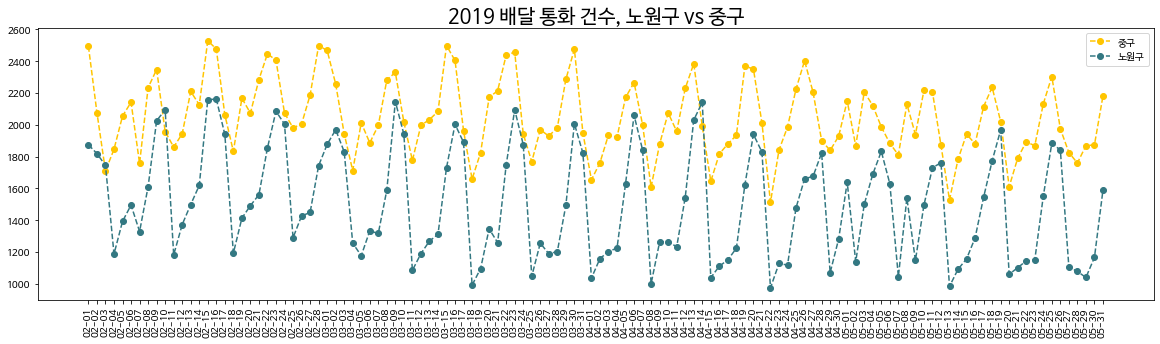

In [22]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
line1, =plt.plot(delijg.iloc[:,0],linestyle='--', marker='o',color = '#ffc500')
line2, =plt.plot(deling.iloc[:,0],linestyle='--', marker='o',color = '#337882')

plt.legend(handles=[line1, line2], labels=['중구','노원구'])

plt.title('2019 배달 통화 건수, 노원구 vs 중구',fontsize=20)
plt.show()

In [23]:
# 중구는 일,월요일이 젤 낫고 금토가 높음
# 노원구는 금토일이 젤 높고(토요일이 MAX)
# 비슷한 트랜드

# **3. 2020 배달 데이터 생성**

In [24]:
call = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/통화_T-map 데이터/Calldata.csv', parse_dates=['일자(YYYYMMDD)'])

In [25]:
call.columns = ['일자', '연령', '성별', '발신도', '발신구', '대분류', '중분류', '통화비율']
calj = call.query('발신구 == "중구" & 대분류 == "음식점"')

In [26]:
calj['일자'] = pd.to_datetime(calj['일자'], format='%Y-%m-%d')
calj['배달'] = call['통화비율']*1000 # 1000곱함..

caljg = calj.groupby(['일자']).agg(np.sum)
caljg = caljg.reset_index(drop=False)
caljg['월'] = caljg['일자'].dt.month 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
caljg['배달'] = caljg[['월', '배달']].apply(lambda x: x[1]*1.693 if x[0] == 2 else x[1]*1.693*1.842 if x[0] == 3 else x[1]*1.693*1.842*1.837 if x[0]==4 else x[1]*1.693*1.842*1.837*1.777, axis=1)
# http://www.leejungmin.org/post/2018/04/21/pandas_apply_and_map/

In [29]:
deli = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/delivery/DELIVERY.csv', parse_dates=['일자'])

In [30]:
deli['일자'] = pd.to_datetime(deli['일자'], format='%Y-%m-%d')
deli = deli.query('시도 == "서울특별시" & 시군구 == "중구"')
deli = deli.drop(['Unnamed: 0'], axis=1)
delig = deli.groupby(['일자']).agg(np.sum)

In [31]:
delig = delig.reset_index(drop=False)
delig['월'] = delig['일자'].dt.month
delig['배달'] = delig['통화건수']

In [32]:
delig['배달'] = delig[['월', '통화건수']].apply(lambda x: x[1]*1.693 if x[0] == 2 else x[1]*1.842 if x[0] == 3 else x[1]*1.837 if x[0]==4 else x[1]*1.777, axis=1)
# http://www.leejungmin.org/post/2018/04/21/pandas_apply_and_map/

In [33]:
delig1 = delig[['일자','통화건수', '배달']]
delig1 = delig1.set_index(['일자'], drop=True)

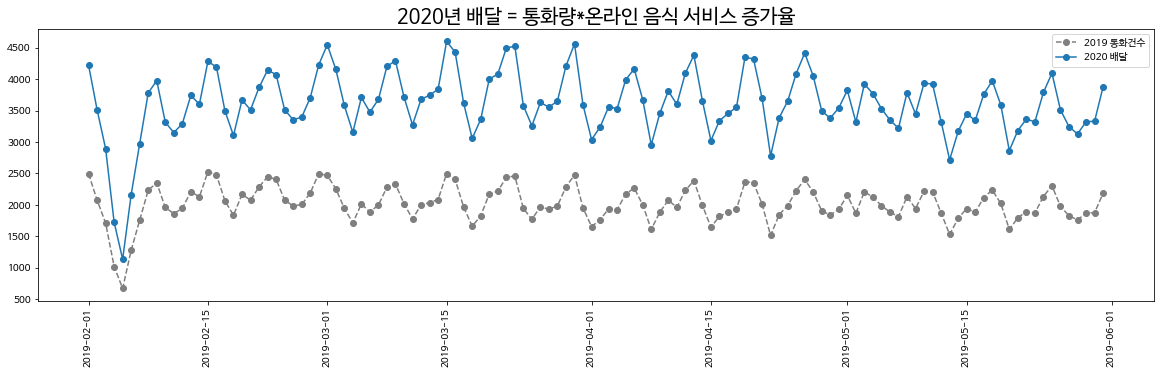

In [34]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
line1,=plt.plot(delig1.iloc[:,0],linestyle='--', marker='o',color = '#7f7f7f')
line2,=plt.plot(delig1.iloc[:,1],marker='o',color = '#1f77b4')
      
plt.legend(handles=[line1, line2], labels=['2019 통화건수', '2020 배달'])

plt.title('2020년 배달 = 통화량*온라인 음식 서비스 증가율',fontsize=20)
plt.show()

In [ ]:
# delig1.to_csv('./gdrive/My Drive/빅콘 대상팀/data/delivery/DELIVERY_G.csv', index=True, encoding='cp949')

# **4. 보간법 (여기만 돌리기)**

In [36]:
deli = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/delivery/DELIVERY.csv', parse_dates=['일자'])
del20 = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/delivery/DELIVERY_GG.csv', encoding='cp949')

In [37]:
del20 = del20.interpolate(method="linear")
del20 = del20.set_index(['일자'])

In [38]:
deli['일자'] = pd.to_datetime(deli['일자'], format='%Y-%m-%d')
deli_s = deli.query('시도 == "서울특별시"')

deli_s = deli_s.query('시군구 == "중구" | 시군구 == "노원구"')

deli_s = deli_s.drop(['Unnamed: 0', '시간대'], axis=1)

deli_s = deli_s.groupby(['일자','읍면동']).agg(np.sum).unstack(level=1).fillna(0)

In [39]:
# 설날 보정
idx = pd.IndexSlice
deli_s.loc['2019-02-04', idx['통화건수',:]] = (deli_s.loc['2019-02-11', idx['통화건수',:]] + deli_s.loc['2019-02-18', idx['통화건수',:]])/2
deli_s.loc['2019-02-05', idx['통화건수',:]] = (deli_s.loc['2019-02-12', idx['통화건수',:]] + deli_s.loc['2019-02-19', idx['통화건수',:]])/2
deli_s.loc['2019-02-06', idx['통화건수',:]] = (deli_s.loc['2019-02-13', idx['통화건수',:]] + deli_s.loc['2019-02-20', idx['통화건수',:]])/2

deli_s = deli_s.stack().reset_index(drop=False)

In [40]:
# deli_s.to_csv('./gdrive/My Drive/빅콘 대상팀/data/delivery/DELI_SEOUL.csv', index=True, encoding='cp949')

deli_s = deli_s.set_index(['일자'])
deli_s = deli_s.drop(deli_s.index[0], axis=0)

## excel 작업
2019-01-01 금요일 삭제

2020으로 바꾸기

 2020-02-29 추가(02-22, 03-07 날짜의 평균)

2020-05-31 추가(05-17, 05-24의 평균)

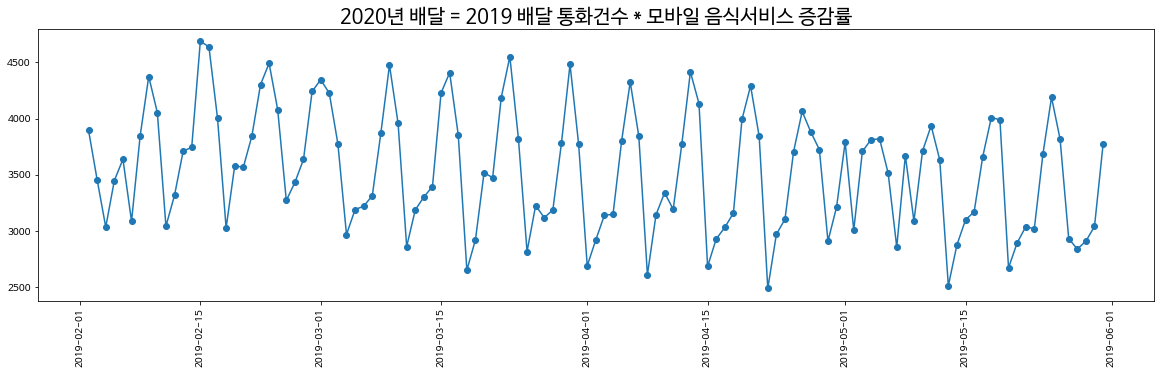

In [41]:
deli_sg = deli_s.groupby('일자').agg(np.sum)

plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
# line1,=plt.plot(delig1.iloc[:,0],linestyle='--', marker='o',color = '#7f7f7f')
plt.plot(deli_sg.iloc[:,0],marker='o',color = '#1f77b4')
      
# plt.legend(handles=[line1, line2], labels=['2019 통화건수', '2020 배달'])

plt.title('2020년 배달 = 2019 배달 통화건수 * 모바일 음식서비스 증감률',fontsize=20)
plt.show()


# **5.읍면동 -> 행정동**

https://www.seoul.go.kr/seoul/autonomy_sub.do 참고해서 법정동 -> 행정동, 총가구원수 비율을 기준으로

In [42]:
deli_s = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/delivery/DELI_SEOUL_FIN.csv', parse_dates=['일자'], encoding='cp949')
hdong = pd.read_excel('./gdrive/My Drive/빅콘 대상팀/data/지역데이터/hdong.xlsx', encoding='cp949')
seoul =  pd.read_excel('./gdrive/My Drive/빅콘 대상팀/data/지역데이터/서울통합.xlsx', sheet_name='Sheet2')

In [43]:
deli_s['일자'] = pd.to_datetime(deli_s['일자'], format='%Y-%m-%d')

In [44]:
seoul = seoul[['HDONG_NM', '인구']]
seoul = seoul.set_index('HDONG_NM')

In [45]:
deli_sm = pd.merge(deli_s, hdong, left_on='읍면동', right_on='읍면동', how='left')

In [46]:
DELFINAL = deli_sm.iloc[0:1]
DELFINAL = DELFINAL.drop('읍면동', axis=1)

In [47]:
# 비율에 따라 법정동 -> 행정동
for i in range(len(deli_sm)):
    hlist = deli_sm.iloc[i,4].split('/')
    hdict = seoul.loc[hlist,'인구'].to_dict()

    for j in range(len(hdict)):
        weight = list(hdict.values())[j]/sum(hdict.values()) # dictionary 길이 만큼

        df = pd.DataFrame([[deli_sm['일자'][i], deli_sm['통화건수'][i]*weight, deli_sm['시군구'][i], list(hdict.keys())[j]]], columns=['일자', '통화건수', '시군구', '행정동'])
        DELFINAL = DELFINAL.append(df)

In [48]:
# index 재설정
DELFINAL = DELFINAL.reset_index(drop=True)

# 임의의 맨 첫 행 삭제
DELFINAL.drop(DELFINAL.head(1).index, inplace=True)

DELFINAL

,일자,통화건수,시군구,행정동
1,2020-02-01,325.045000,노원구,공릉1동
2,2020-02-01,341.955000,노원구,공릉2동
3,2020-02-01,0.000000,중구,광희동
4,2020-02-01,0.000000,중구,명동
5,2020-02-01,0.000000,중구,명동
...,...,...,...,...
8103,2020-05-31,10.871297,중구,회현동
8104,2020-05-31,6.628703,중구,명동
8105,2020-05-31,4.659127,중구,회현동
8106,2020-05-31,2.840873,중구,명동


In [49]:
DELFINAL1 = DELFINAL.groupby(['일자', '시군구', '행정동']).agg(np.sum).reset_index(drop=False)

In [50]:
DELFINAL2 = DELFINAL.groupby(['일자', '시군구', '행정동']).agg(np.sum).unstack(level=[1,2]).droplevel(level=[0,1], axis=1).reset_index(drop=False)

In [ ]:
# DELFINAL1.to_csv('./gdrive/My Drive/빅콘 대상팀/data/delivery/DELIVERY_FINAL_V1.csv', index=False, encoding='cp949')

In [ ]:
# DELFINAL2.to_csv('./gdrive/My Drive/빅콘 대상팀/data/delivery/DELIVERY_FINAL_V2.csv', index=False, encoding='cp949')